In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [24]:
q = QuantumRegister(3, 'data')  #data qubit --> 0 encoding qubit--> 1,2
a = QuantumRegister(2, 'ancilla')  #ancilla qubits (kinda llike parity)
c = ClassicalRegister(2, 'syndrome') #Syndrome
result = ClassicalRegister(3,'Result')
qc_corrected = QuantumCircuit(q,a,c,result)

#input state
qc_corrected.h(0)
qc_corrected.barrier()
#encoding
qc_corrected.cx(0,1)
qc_corrected.cx(0,2)
qc_corrected.x(2) #error (one only)
qc_corrected.barrier()
#syndrome measurement
qc_corrected.cx(0,a[0])
qc_corrected.cx(1,a[0])
qc_corrected.cx(1,a[1])
qc_corrected.cx(2,a[1])
qc_corrected.barrier()
qc_corrected.measure(a,c)
qc_corrected.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "data"), index=0>, <Qubit register=(3, "data"), index=1>, <Qubit register=(3, "data"), index=2>, <Qubit register=(2, "ancilla"), index=0>, <Qubit register=(2, "ancilla"), index=1>), clbits=())

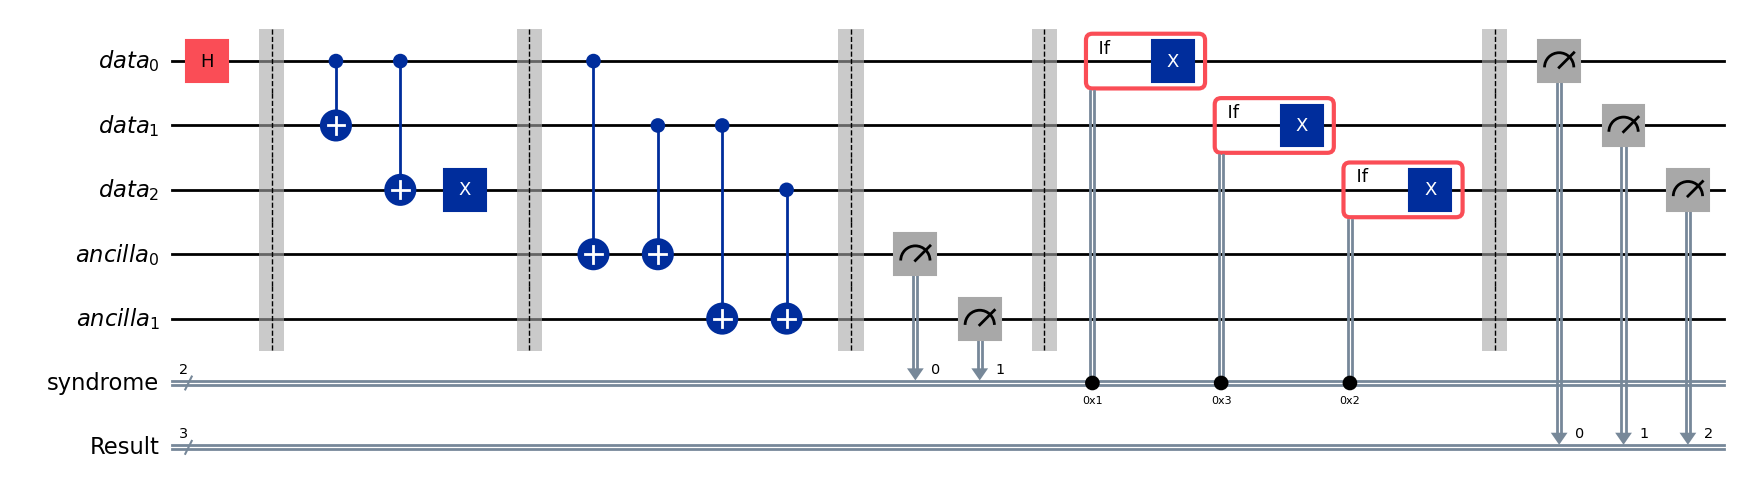

In [25]:
#correction
"""Syndrome 00 --> no error
            01 --> error on q[0]
            11 --> error on q[1]
            10 --> error on q[2]
"""
with qc_corrected.if_test((c, 0b01)):
    qc_corrected.x(q[0])
with qc_corrected.if_test((c, 0b11)):
    qc_corrected.x(q[1])
with qc_corrected.if_test((c, 0b10)):
    qc_corrected.x(q[2])
qc_corrected.barrier()
qc_corrected.measure(q,result)
qc_corrected.draw('mpl')

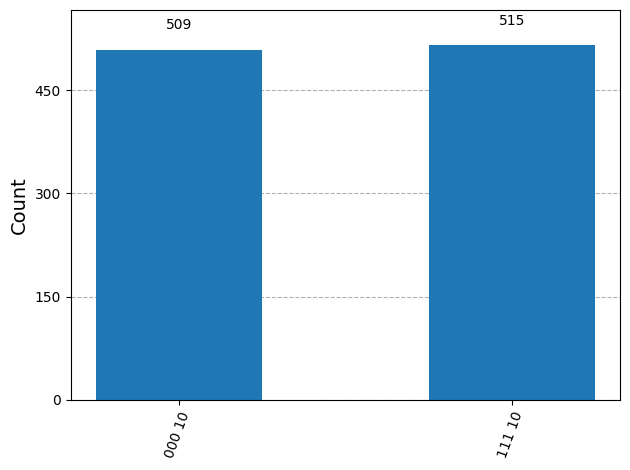

In [22]:
backend = AerSimulator()
job = backend.run(qc_corrected,shots=1024)
result = job.result()
counts = result.get_counts(qc_corrected)
plot_histogram(counts)